In [7]:
DIR='/Users/ravali/Desktop/DataScience-regression/Data'
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv(DIR+'/mlb.csv', delimiter=',',low_memory=False)
#display(df)
df=df.dropna()
display(df)
#print(df.dtypes)

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
10,2018-10-08,2018,0,d,ATL,LAD,1517.892107,1575.400072,0.436056,0.563944,...,54.261652,54.908941,11.784725,4.429677,0.441634,0.558366,1515.044761,1583.564419,2.0,6.0
11,2018-10-08,2018,0,d,CLE,HOU,1551.097071,1594.329021,0.463164,0.536836,...,57.272579,51.725716,6.551810,-20.526626,0.497093,0.502907,1544.941531,1609.053232,3.0,11.0
12,2018-10-07,2018,0,d,ATL,LAD,1515.467257,1577.824921,0.426926,0.573074,...,48.953581,58.735100,-13.388602,21.969000,0.352993,0.647007,1518.348482,1580.260697,6.0,5.0
13,2018-10-07,2018,0,d,COL,MIL,1529.533596,1551.927180,0.503082,0.496918,...,58.707979,49.161242,18.874343,-10.286391,0.557317,0.442683,1525.783927,1559.653764,0.0,6.0
14,2018-10-06,2018,0,d,BOS,NYY,1578.802911,1570.155245,0.562319,0.437681,...,55.966872,55.541432,12.673207,14.742109,0.556967,0.443033,1576.879922,1577.600781,2.0,6.0
15,2018-10-06,2018,0,d,HOU,CLE,1592.424849,1553.001243,0.619351,0.380649,...,58.194777,59.063816,10.921598,14.971681,0.629159,0.370841,1603.294021,1550.700743,3.0,1.0
16,2018-10-05,2018,0,d,LAD,ATL,1575.704646,1517.587533,0.652551,0.347449,...,56.216444,52.846633,11.245915,4.446633,0.673807,0.326193,1583.097153,1515.512027,3.0,0.0
17,2018-10-05,2018,0,d,BOS,NYY,1577.042515,1571.915641,0.555658,0.444342,...,64.455073,54.688783,53.047541,9.768456,0.647016,0.352984,1581.183851,1573.296852,5.0,4.0
18,2018-10-05,2018,0,d,MIL,COL,1548.743024,1532.717752,0.576203,0.423797,...,53.830239,53.403088,11.985394,-5.571580,0.611412,0.388588,1554.297821,1531.139870,4.0,0.0
19,2018-10-05,2018,0,d,HOU,CLE,1589.204279,1556.221813,0.607629,0.392371,...,61.734642,59.429325,27.978538,15.541880,0.647372,0.352628,1601.458236,1552.536528,7.0,2.0


In [2]:
obj_df = df.select_dtypes(include=['object']).copy()
display(obj_df.dtypes)

date        object
playoff     object
team1       object
team2       object
pitcher1    object
pitcher2    object
dtype: object

In [3]:
obj_df["date"] = obj_df["date"].astype('category')
obj_df["date"] = obj_df["date"].cat.codes

obj_df["playoff"] = obj_df["playoff"].astype('category')
obj_df["playoff"] = obj_df["playoff"].cat.codes
obj_df["team1"] = obj_df["team1"].astype('category')
obj_df["team1"] = obj_df["team1"].cat.codes
obj_df["team2"] = obj_df["team2"].astype('category')
obj_df["team2"] = obj_df["team2"].cat.codes
obj_df["pitcher1"] = obj_df["pitcher1"].astype('category')
obj_df["pitcher1"] = obj_df["pitcher1"].cat.codes
obj_df["pitcher2"] = obj_df["pitcher2"].astype('category')
obj_df["pitcher2"] = obj_df["pitcher2"].cat.codes
print(obj_df)

        date  playoff  team1  team2  pitcher1  pitcher2
10      1129        1      2     14       102       108
11      1129        1      8     12       101        32
12      1128        1      2     14       119       132
13      1128        1      9     15        43       131
14      1127        1      4     18        32        93
15      1127        1     12      8        44        17
16      1126        1     14      2        23         5
17      1126        1      4     18        20        50
18      1126        1     15      9        63       128
19      1126        1     12      8        77        30
20      1125        1     14      2        48       102
21      1125        1     15      9        10         6
22      1124        0     18     19        85        88
23      1123        0      5      9        70        83
2455    1122        3     14     12       133        87
2456    1121        3     14     12       110        81
2457    1120        3     12     14        29   

In [4]:
df_final = pd.concat([df, obj_df], axis=1)
#display(df_final)
display(df_final.dtypes)

date             object
season            int64
neutral           int64
playoff          object
team1            object
team2            object
elo1_pre        float64
elo2_pre        float64
elo_prob1       float64
elo_prob2       float64
elo1_post       float64
elo2_post       float64
rating1_pre     float64
rating2_pre     float64
pitcher1         object
pitcher2         object
pitcher1_rgs    float64
pitcher2_rgs    float64
pitcher1_adj    float64
pitcher2_adj    float64
rating_prob1    float64
rating_prob2    float64
rating1_post    float64
rating2_post    float64
score1          float64
score2          float64
date              int16
playoff            int8
team1              int8
team2              int8
pitcher1          int16
pitcher2          int16
dtype: object

In [5]:
display(obj_df.dtypes)

date        int16
playoff      int8
team1        int8
team2        int8
pitcher1    int16
pitcher2    int16
dtype: object

In [8]:
df.drop(['date','playoff','team1','team2','pitcher1','pitcher2'], axis=1, inplace=True)
display(df)

,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
10,2018,0,1517.892107,1575.400072,0.436056,0.563944,1514.643032,1578.649147,1518.348482,1580.260697,54.261652,54.908941,11.784725,4.429677,0.441634,0.558366,1515.044761,1583.564419,2.0,6.0
11,2018,0,1551.097071,1594.329021,0.463164,0.536836,1545.832159,1599.593933,1550.700743,1603.294021,57.272579,51.725716,6.551810,-20.526626,0.497093,0.502907,1544.941531,1609.053232,3.0,11.0
12,2018,0,1515.467257,1577.824921,0.426926,0.573074,1517.892107,1575.400072,1515.512027,1583.097153,48.953581,58.735100,-13.388602,21.969000,0.352993,0.647007,1518.348482,1580.260697,6.0,5.0
13,2018,0,1529.533596,1551.927180,0.503082,0.496918,1524.817020,1556.643756,1531.139870,1554.297821,58.707979,49.161242,18.874343,-10.286391,0.557317,0.442683,1525.783927,1559.653764,0.0,6.0
14,2018,0,1578.802911,1570.155245,0.562319,0.437681,1574.447640,1574.510516,1581.183851,1573.296852,55.966872,55.541432,12.673207,14.742109,0.556967,0.443033,1576.879922,1577.600781,2.0,6.0
15,2018,0,1592.424849,1553.001243,0.619351,0.380649,1594.329021,1551.097071,1601.458236,1552.536528,58.194777,59.063816,10.921598,14.971681,0.629159,0.370841,1603.294021,1550.700743,3.0,1.0
16,2018,0,1575.704646,1517.587533,0.652551,0.347449,1577.824921,1515.467257,1581.164029,1517.445151,56.216444,52.846633,11.245915,4.446633,0.673807,0.326193,1583.097153,1515.512027,3.0,0.0
17,2018,0,1577.042515,1571.915641,0.555658,0.444342,1578.802911,1570.155245,1579.899782,1574.580921,64.455073,54.688783,53.047541,9.768456,0.647016,0.352984,1581.183851,1573.296852,5.0,4.0
18,2018,0,1548.743024,1532.717752,0.576203,0.423797,1551.927180,1529.533596,1551.467056,1533.970635,53.830239,53.403088,11.985394,-5.571580,0.611412,0.388588,1554.297821,1531.139870,4.0,0.0
19,2018,0,1589.204279,1556.221813,0.607629,0.392371,1592.424849,1553.001243,1598.686964,1555.307799,61.734642,59.429325,27.978538,15.541880,0.647372,0.352628,1601.458236,1552.536528,7.0,2.0


In [9]:
df2=pd.concat([df, obj_df], axis=1)
display(df2)
display(df2.dtypes)

,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,rating1_pre,rating2_pre,...,rating1_post,rating2_post,score1,score2,date,playoff,team1,team2,pitcher1,pitcher2
10,2018,0,1517.892107,1575.400072,0.436056,0.563944,1514.643032,1578.649147,1518.348482,1580.260697,...,1515.044761,1583.564419,2.0,6.0,1129,1,2,14,102,108
11,2018,0,1551.097071,1594.329021,0.463164,0.536836,1545.832159,1599.593933,1550.700743,1603.294021,...,1544.941531,1609.053232,3.0,11.0,1129,1,8,12,101,32
12,2018,0,1515.467257,1577.824921,0.426926,0.573074,1517.892107,1575.400072,1515.512027,1583.097153,...,1518.348482,1580.260697,6.0,5.0,1128,1,2,14,119,132
13,2018,0,1529.533596,1551.927180,0.503082,0.496918,1524.817020,1556.643756,1531.139870,1554.297821,...,1525.783927,1559.653764,0.0,6.0,1128,1,9,15,43,131
14,2018,0,1578.802911,1570.155245,0.562319,0.437681,1574.447640,1574.510516,1581.183851,1573.296852,...,1576.879922,1577.600781,2.0,6.0,1127,1,4,18,32,93
15,2018,0,1592.424849,1553.001243,0.619351,0.380649,1594.329021,1551.097071,1601.458236,1552.536528,...,1603.294021,1550.700743,3.0,1.0,1127,1,12,8,44,17
16,2018,0,1575.704646,1517.587533,0.652551,0.347449,1577.824921,1515.467257,1581.164029,1517.445151,...,1583.097153,1515.512027,3.0,0.0,1126,1,14,2,23,5
17,2018,0,1577.042515,1571.915641,0.555658,0.444342,1578.802911,1570.155245,1579.899782,1574.580921,...,1581.183851,1573.296852,5.0,4.0,1126,1,4,18,20,50
18,2018,0,1548.743024,1532.717752,0.576203,0.423797,1551.927180,1529.533596,1551.467056,1533.970635,...,1554.297821,1531.139870,4.0,0.0,1126,1,15,9,63,128
19,2018,0,1589.204279,1556.221813,0.607629,0.392371,1592.424849,1553.001243,1598.686964,1555.307799,...,1601.458236,1552.536528,7.0,2.0,1126,1,12,8,77,30


season            int64
neutral           int64
elo1_pre        float64
elo2_pre        float64
elo_prob1       float64
elo_prob2       float64
elo1_post       float64
elo2_post       float64
rating1_pre     float64
rating2_pre     float64
pitcher1_rgs    float64
pitcher2_rgs    float64
pitcher1_adj    float64
pitcher2_adj    float64
rating_prob1    float64
rating_prob2    float64
rating1_post    float64
rating2_post    float64
score1          float64
score2          float64
date              int16
playoff            int8
team1              int8
team2              int8
pitcher1          int16
pitcher2          int16
dtype: object

In [10]:
Y=df2.score1 #output label
X=df2.drop('score1',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.8)
display(X_train)

,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,rating1_pre,rating2_pre,...,rating_prob2,rating1_post,rating2_post,score2,date,playoff,team1,team2,pitcher1,pitcher2
29572,2006,0,1556.065000,1539.891000,0.576482,0.423518,1551.520000,1544.436000,1554.040000,1540.983000,...,0.412922,1549.285000,1545.739000,5.0,865,2,19,10,7,472
111030,1968,0,1553.385000,1563.147000,0.527293,0.472707,1545.033000,1571.498000,1552.674000,1563.715000,...,0.487686,1545.014000,1571.375000,13.0,327,3,25,10,547,398
29561,2006,0,1553.596000,1518.725000,0.611079,0.388921,1548.149000,1524.172000,1555.113000,1518.207000,...,0.382374,1549.291000,1524.029000,7.0,874,3,10,25,77,465
56325,1995,0,1539.667000,1599.346000,0.431963,0.568037,1542.065000,1596.948000,1534.210000,1598.841000,...,0.588287,1536.916000,1596.136000,2.0,644,2,23,8,563,383
17251,2011,0,1577.227000,1551.068000,0.595075,0.404925,1579.188000,1549.107000,1580.191000,1551.644000,...,0.392320,1582.353000,1549.482000,2.0,982,3,27,25,15,209
24658,2008,0,1518.286000,1553.404000,0.478679,0.521321,1521.011000,1550.678000,1519.149000,1552.069000,...,0.501135,1521.769000,1549.449000,3.0,902,1,6,26,67,95
54035,1996,0,1567.237000,1536.290000,0.603898,0.396102,1570.386000,1533.141000,1566.442000,1536.129000,...,0.392463,1570.052000,1532.520000,4.0,659,1,8,3,370,419
74983,1986,0,1535.039000,1546.346000,0.524336,0.475664,1539.630000,1541.755000,1533.816000,1542.754000,...,0.458631,1538.493000,1538.078000,4.0,532,2,4,0,175,392
81346,1983,0,1561.999000,1572.691000,0.525513,0.474487,1565.766000,1568.923000,1563.425000,1570.502000,...,0.463692,1566.965000,1566.962000,0.0,491,2,3,6,169,154
85603,1981,0,1554.033000,1525.247000,0.599924,0.400076,1550.610000,1528.670000,1550.401000,1527.020000,...,0.393460,1546.878000,1530.544000,5.0,461,1,18,15,310,364


In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np
model = LinearRegression()

model.fit(X_train, y_train)
predictions = model.predict(X_test)
display(model.score(X_test, y_test))

#display(predictions)
predictions1=predictions.astype(int)
display(predictions1)

0.8254778968990705

array([0, 5, 4, ..., 0, 3, 6])

In [13]:
np.savetxt('/Users/ravali/Desktop/DataScience-regression/Data/predscore1.csv',predictions1,delimiter=',')

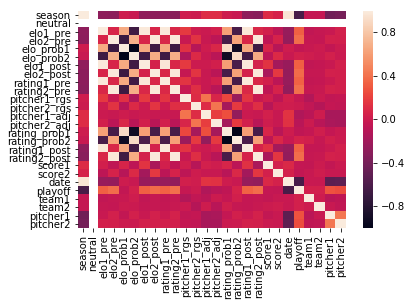

In [16]:
import seaborn as sns
corr = df2.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns.values,
        yticklabels=corr.columns.values)

In [15]:
corr.style.background_gradient()

/Users/ravali/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2,date,playoff,team1,team2,pitcher1,pitcher2
season,1,nan,-0.2851,-0.293909,0.0109419,-0.0109419,-0.277271,-0.294098,-0.296172,-0.307082,0.0176522,0.00244947,0.111622,0.109528,0.0121653,-0.0121653,-0.288799,-0.306903,0.103813,0.0597861,0.963273,-0.622458,-0.0335102,-0.036128,-0.42365,-0.40573
neutral,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
elo1_pre,-0.2851,nan,1,0.0771029,0.669824,-0.669824,0.985815,0.0767276,0.990555,0.0798481,0.174031,0.0129726,-0.00145174,0.0338321,0.612877,-0.612877,0.977694,0.07899,0.0372737,-0.0699352,-0.243292,0.333997,-0.0518799,-0.0298503,-0.0086011,0.0407681
elo2_pre,-0.293909,nan,0.0771029,1,-0.688475,0.688475,0.0771451,0.986376,0.0803318,0.991127,-0.0186977,0.142276,-0.0170234,-0.0775768,-0.625204,0.625204,0.080234,0.978401,-0.0579876,0.0584095,-0.256461,0.384005,-0.0283072,-0.0326204,0.0431313,0.0345929
elo_prob1,0.0109419,nan,0.669824,-0.688475,1,-1,0.659441,-0.678569,0.660607,-0.679821,0.140276,-0.0965728,0.0121541,0.082283,0.911638,-0.911638,0.651291,-0.670935,0.0699962,-0.0942057,0.0141071,-0.0412841,-0.0157977,0.00330689,-0.0399008,0.00246907
elo_prob2,-0.0109419,nan,-0.669824,0.688475,-1,1,-0.659441,0.678569,-0.660607,0.679821,-0.140276,0.0965728,-0.0121541,-0.082283,-0.911638,0.911638,-0.651291,0.670935,-0.0699962,0.0942057,-0.0141071,0.0412841,0.0157977,-0.00330689,0.0399008,-0.00246907
elo1_post,-0.277271,nan,0.985815,0.0771451,0.659441,-0.659441,1,0.0491505,0.97611,0.0798235,0.179371,0.000765789,0.0051135,0.0350507,0.604643,-0.604643,0.990791,0.0521978,0.144104,-0.181327,-0.236563,0.33261,-0.0509083,-0.0330236,-0.0122273,0.0424045
elo2_post,-0.294098,nan,0.0767276,0.986376,-0.678569,0.678569,0.0491505,1,0.0802966,0.977644,-0.0260136,0.152281,-0.0232249,-0.0782464,-0.617441,0.617441,0.0533751,0.991325,-0.162471,0.167792,-0.256598,0.376098,-0.0282131,-0.0287035,0.0462592,0.0320119
rating1_pre,-0.296172,nan,0.990555,0.0803318,0.660607,-0.660607,0.97611,0.0802966,1,0.0861477,0.155375,0.0145095,-0.00897335,0.0367461,0.611834,-0.611834,0.98652,0.0857019,0.0315937,-0.0729532,-0.24976,0.338587,-0.0392763,-0.0325913,-0.00253962,0.0381602
rating2_pre,-0.307082,nan,0.0798481,0.991127,-0.679821,0.679821,0.0798235,0.977644,0.0861477,1,-0.0231605,0.120863,-0.0164358,-0.0889659,-0.623375,0.623375,0.0860476,0.987097,-0.0595791,0.0559229,-0.26563,0.391563,-0.0295303,-0.0194572,0.0473329,0.038063


/Users/ravali/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


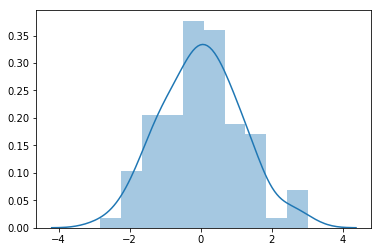

In [17]:
df2 = np.random.normal(size=100)
sns.distplot(df2);